# Aluminio

In [1]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz', 'fss_0340kHz', 'fss_0500kHz', 'fss_0640kHz', 'fss_0840kHz', 'fss_1000kHz', 'fss_1200kHz']


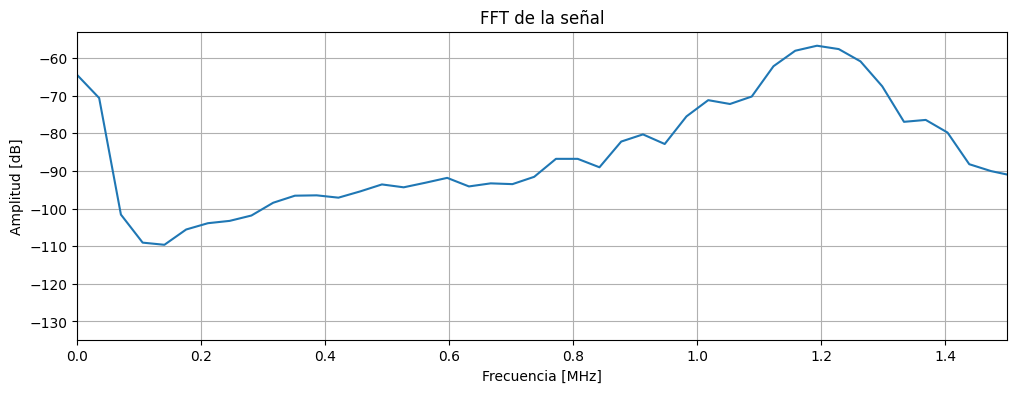

Mean frecuency max = 1192.87532 kHz.


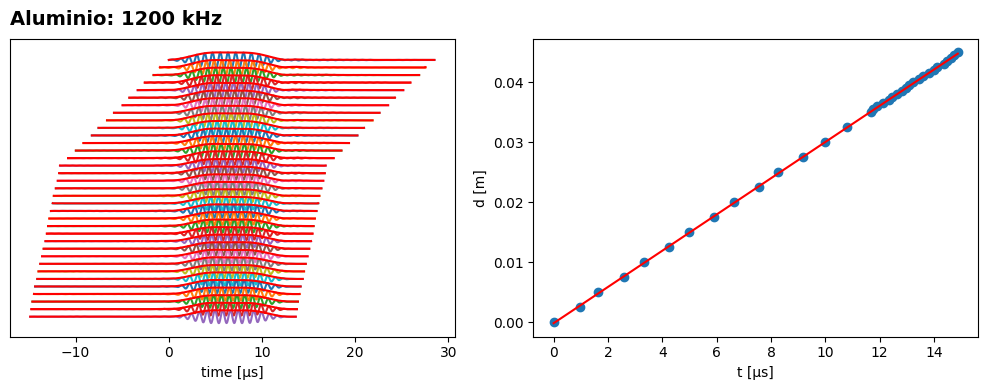

vg = 3020.76468 m/s; Intercept = -0.00015; r2 = 0.99992.


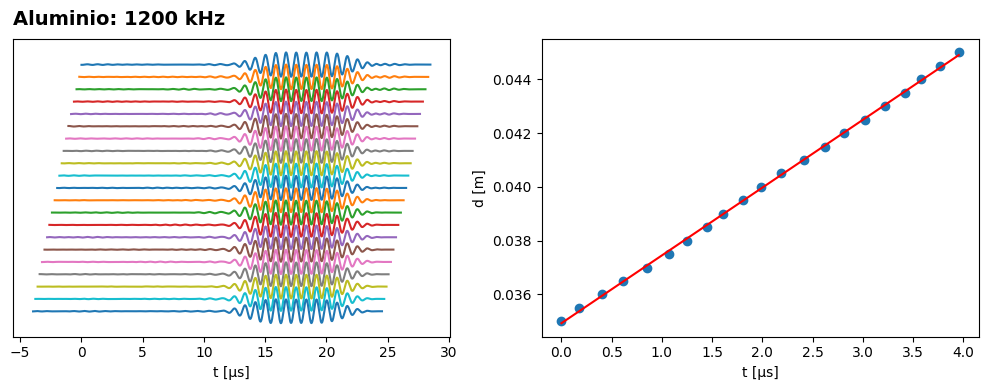

vf = 2520.99329 m/s; Intercept = 0.03493; r2 = 0.99951.


In [2]:
import importlib, lambmath
importlib.reload(lambmath)
from lambmath import full_analisis

fa = full_analisis(data_file["fss_1200kHz"], dist, type_dist = "inv", bp_w = 400e3, round_to = 5, title = "Aluminio: 1200 kHz")

In [445]:
for name in names:
    print("-----------------------------------------------------------")
    full_analisis(data_file[name], dist, type_dist = "inv", bp_w = 400e3, round_to = 5, plot = False)
print("-----------------------------------------------------------")

-----------------------------------------------------------
Mean frecuency max = 248.55281 kHz.
vg = 2817.78737 m/s; Intercept = -1e-05; r2 = 0.99988.
vf = 1659.05924 m/s; Intercept = 0.03496; r2 = 0.99978.
-----------------------------------------------------------
Mean frecuency max = 334.61326 kHz.
vg = 2816.88911 m/s; Intercept = -0.00023; r2 = 0.9999.
vf = 1828.31159 m/s; Intercept = 0.03495; r2 = 0.99979.
-----------------------------------------------------------
Mean frecuency max = 496.8372 kHz.
vg = 2943.65916 m/s; Intercept = -7e-05; r2 = 0.99992.
vf = 2068.6419 m/s; Intercept = 0.03497; r2 = 0.99986.
-----------------------------------------------------------
Mean frecuency max = 642.75918 kHz.
vg = 3007.10633 m/s; Intercept = -0.00023; r2 = 0.99993.
vf = 2206.34911 m/s; Intercept = 0.0349; r2 = 0.99968.
-----------------------------------------------------------
Mean frecuency max = 854.262 kHz.
vg = 3074.56679 m/s; Intercept = -0.00018; r2 = 0.99985.
vf = 2375.50054 m/s; 

fss_0250kHz 
vg = 2757.02167 m/s; Intercept = 6e-05; r2 = 0.99986.
vf = 1659.05924 m/s; Intercept = 0.03496; r2 = 0.99978.
fss_0340kHz 
vg = 2806.05557 m/s; Intercept = -0.00015; r2 = 0.9999.
vf = 1833.91493 m/s; Intercept = 0.03494; r2 = 0.9998.
fss_0500kHz 
vg = 2940.64983 m/s; Intercept = -0.00013; r2 = 0.99994.
vf = 2068.6419 m/s; Intercept = 0.03497; r2 = 0.99986.
fss_0640kHz 
vg = 3018.66215 m/s; Intercept = -0.00021; r2 = 0.9999.
vf = 2206.34911 m/s; Intercept = 0.0349; r2 = 0.99968.
fss_0840kHz 
vg = 3074.56679 m/s; Intercept = -0.00018; r2 = 0.99985.
vf = 2375.50054 m/s; Intercept = 0.03494; r2 = 0.99979.
fss_1000kHz 
vg = 3042.18306 m/s; Intercept = -6e-05; r2 = 0.99985.
vf = 2439.93832 m/s; Intercept = 0.03494; r2 = 0.99937.
fss_1200kHz 
vg = 3020.76468 m/s; Intercept = -0.00015; r2 = 0.99992.
vf = 2520.99329 m/s; Intercept = 0.03493; r2 = 0.99951.


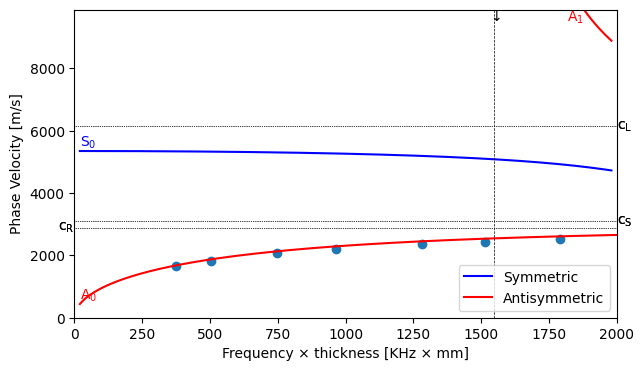

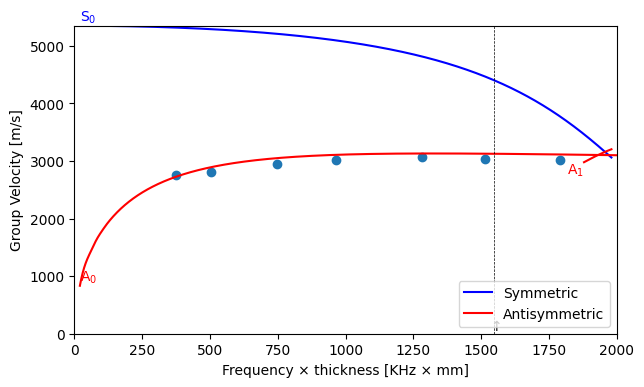

In [446]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import warnings
from lambmath import full_analisis, max_frecuency
from lambwaves import Lamb


data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3

roundto = 5
b = 1.5 # solar cell Thickness mm
names_new = names
all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names_new)):
    data_in = data_file[names_new[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    print(names_new[n], f'\nvg = {round(vg[0], roundto)} m/s; Intercept = {round(vg[1], roundto)}; r2 = {round(vg[2], roundto)}.')
    print(f'vf = {round(vf[0], roundto)} m/s; Intercept = {round(vf[1], roundto)}; r2 = {round(vf[2], roundto)}.')
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = 68.9e9          # E = Young's modulus, in Pa.
p = 2700            # p = Density (rho), in kg/m3.
v = 0.33            # v = Poisson's ratio (nu).

c_L = np.sqrt(E*(1-v) / (p*(1+v)*(1-2*v)))
c_S = np.sqrt(E / (2*p*(1+v)))

c_R = c_S * ((0.862+1.14*v) / (1+v))

# Example: A 10 mm aluminum plate.
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    alum = Lamb(thickness= b, #en mm
                nmodes_sym=3, 
                nmodes_antisym=3,
                fd_max=2000, 
                vp_max=10000, 
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminium')

# Plot phase velocity, group velocity and wavenumber.

alum.plot_phase_velocity()
plt.scatter(frb, vfs)


alum.plot_group_velocity()
plt.scatter(frb, vgs)
plt.show()

E = 64.597 [GPa],  ν = 0.318
7678.123285779248


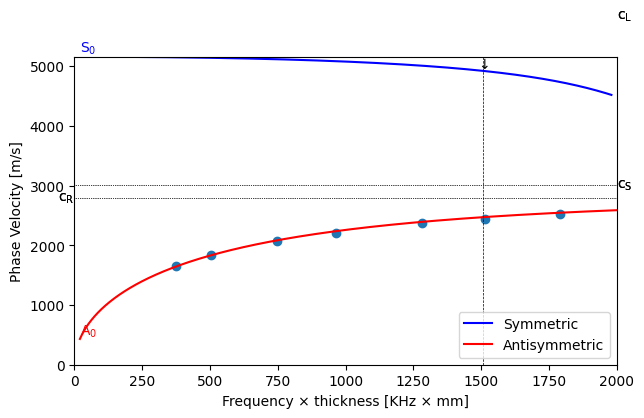

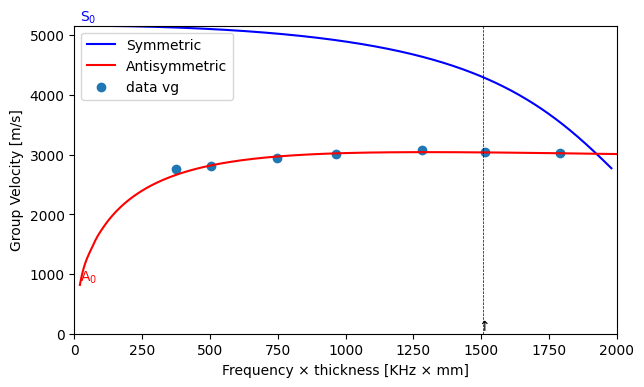

In [447]:
from scipy.io import loadmat
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

data_file = loadmat('erik/test_Al_tren_2205.mat')
names = [i for i in data_file.keys()][3:]


roundto = 5
b = 1.5            #Thickness mm
p = 2700           #kg/m³
E0 = 69e9
v0 = 0.34
bounds = ([1e9, 0], [100e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2700          #kg/m³

    c_L = np.sqrt(E*(1-v) / (p*(1+v)*(1-2*v)))
    c_S = np.sqrt(E / (2*p*(1+v)))
    c_R = c_S * ((0.862+1.14*v) / (1+v))

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 1.5, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=2000, 
                    vp_max=10000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L = np.sqrt(E*(1-v) / (p*(1+v)*(1-2*v)))
c_S = np.sqrt(E / (2*p*(1+v)))

c_R = c_S * ((0.862+1.14*v) / (1+v))
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=2000, 
                vp_max=10000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity()
plt.scatter(frb, vfs, label="data vp")

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="data vg")

plt.legend()
plt.show()  

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings


# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

roundto = 5
bounds = ([1e9, 0], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.1, 2)

    E0 = 69e9 * r
    v0 = 0.34

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2700          # Densidad en kg/m³

        c_L = np.sqrt(E*(1-v) / (p*(1+v)*(1-2*v)))
        c_S = np.sqrt(E / (2*p*(1+v)))
        c_R = c_S * ((0.862+1.14*v) / (1+v))

        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 1.5, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=2000, 
                        vp_max=10000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min(), 2)
v, v_er = (v.mean(), v.max() - v.min(), 2)

print("E =", E,"±", E_er)
print("v =", v,"±", v_er)


KeyboardInterrupt: 

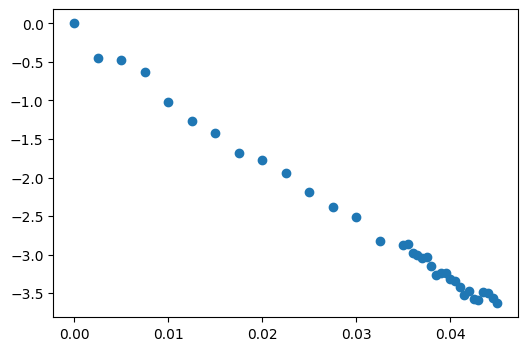

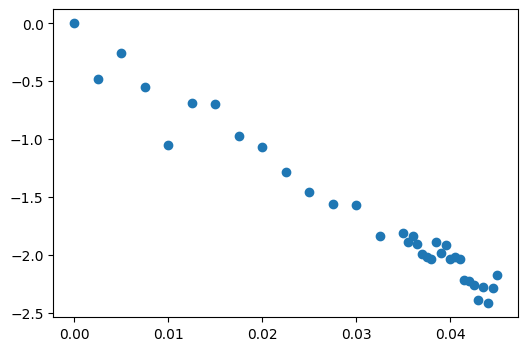

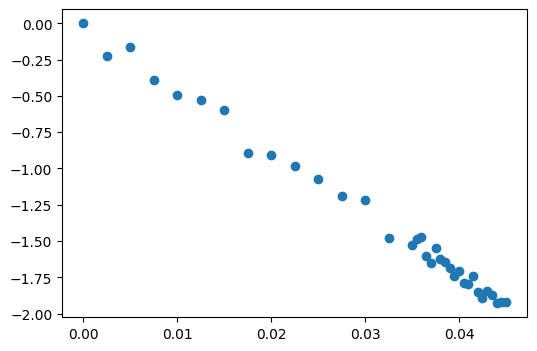

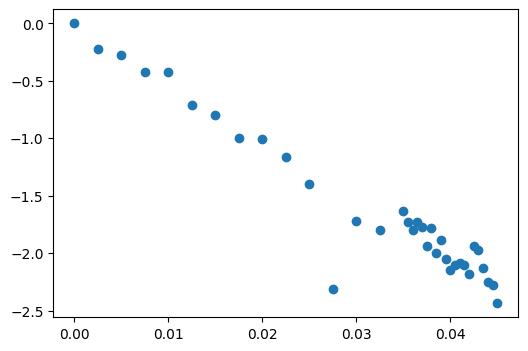

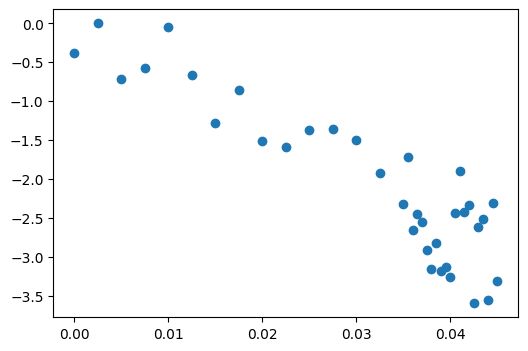

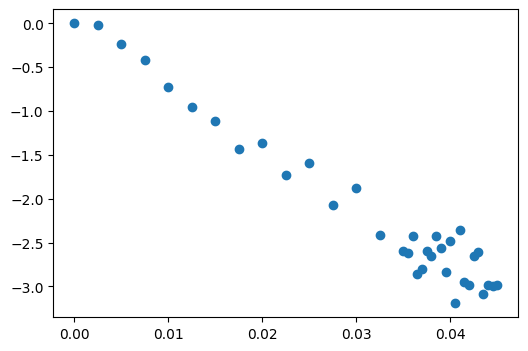

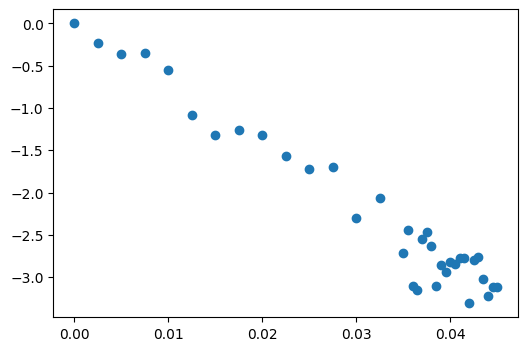

[-3.896 -2.38  -2.115 -2.424 -3.368 -3.397 -3.562]
[0.995 0.968 0.993 0.93  0.818 0.958 0.955]


In [450]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []

for name in names:
    A = amplitudes(data_file[name], dist, bp_w = 400e3)
    lr = linregress(dist, np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

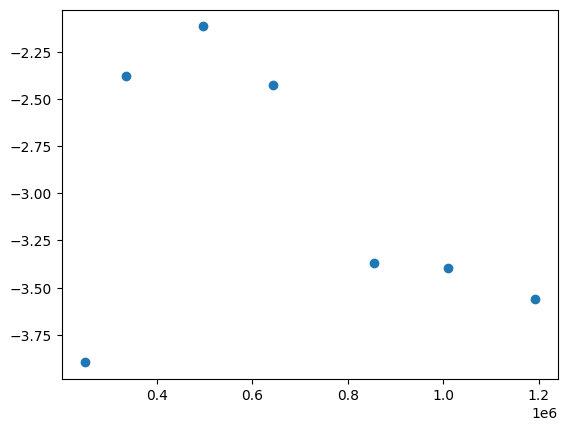

In [451]:
fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)

# Célula tipo p

## Pulso de banda ancha

In [88]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test3_cs_0805_inv.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz_inv', 'fss_0340kHz_inv', 'fss_0510kHz_inv', 'fss_0640kHz_inv', 'fss_0830kHz_inv', 'fss_1000KHz_inv', 'fss_1200kHz_inv_05us', 'fss_1200kHz_inv_10us']


In [89]:
names = ['fss_0250kHz_inv', 'fss_0340kHz_inv', 'fss_0510kHz_inv', 'fss_0640kHz_inv', 'fss_0830kHz_inv', 'fss_1000KHz_inv', 'fss_1200kHz_inv_05us']

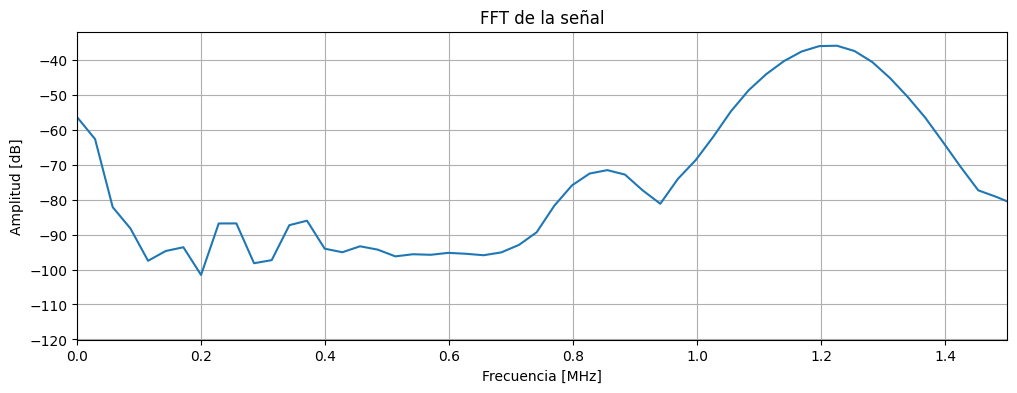

Mean frecuency max = 1225.0623 kHz.


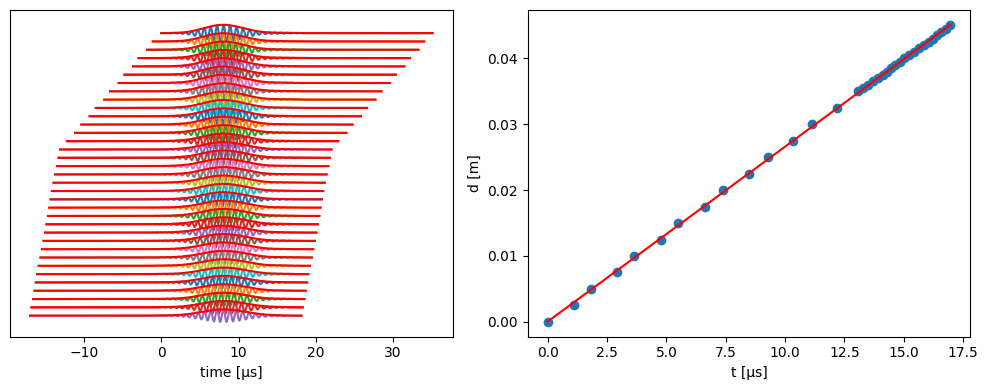

vg = 2655.0815 m/s; Intercept = 0.0001; r2 = 0.9998.


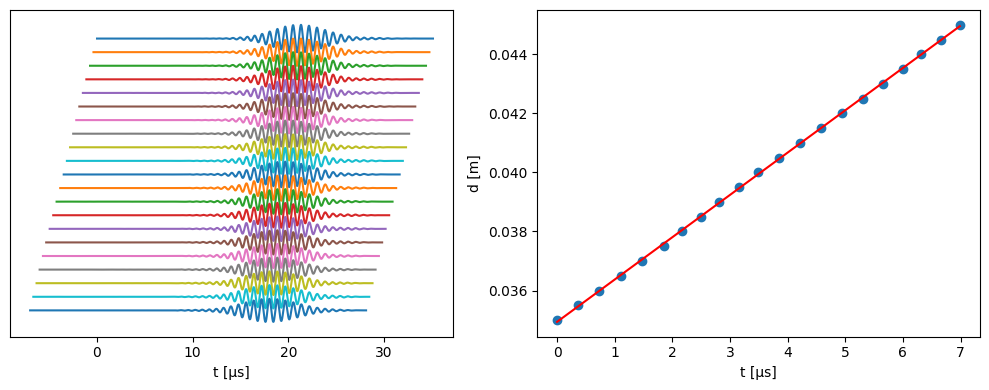

vf = 1433.4174 m/s; Intercept = 0.0349; r2 = 0.9998.


In [55]:
import importlib, lambmath         # primera importación
importlib.reload(lambmath)

from lambmath import full_analisis

fa = full_analisis(data_file["fss_1200kHz_inv_05us"], dist, "inv", bp_w = 400e3)

E = 15.646 [GPa],  ν = -0.869
4932.952968922271


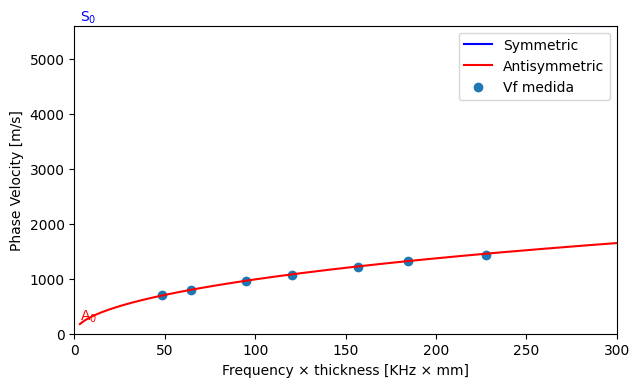

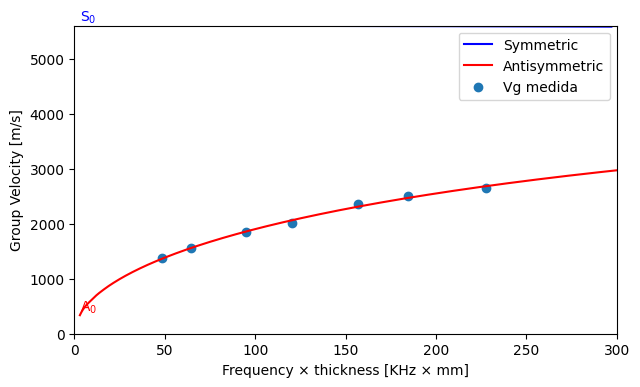

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency, wave_speeds
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.186          #Thickness mm
p = 2033           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([1e9, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2033          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 0.186, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=400, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E_fit, v_fit, p)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=300, 
                vp_max=15000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity(material_velocities = False)
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.186 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.11, 2)

    E0 = 100e9 * r
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.186, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min())
v, v_er = (v.mean(), v.max() - v.min())

print("E =", E,"±", E_er)
print("v =", v,"±", v_er)


E = 34.40456920760046 ± 64.22102641386776
v = -0.57864211588355 ± 1.0246096894718777


[ -40.043  -40.361  -48.457  -56.511  -54.337  -24.818 -102.805]
[0.699 0.941 0.958 0.879 0.828 0.467 0.791]


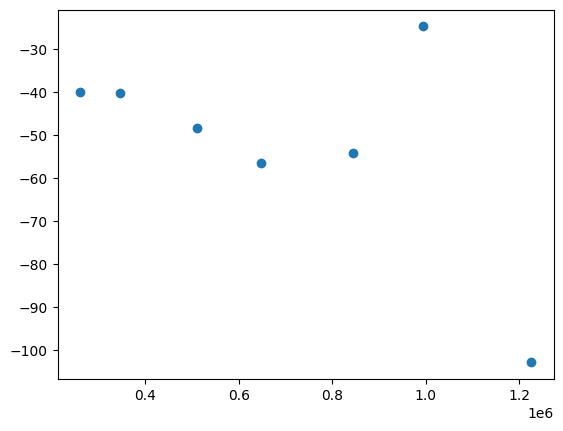

In [99]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 200e3, 200e3, 300e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False)
    lr = linregress(dist, 20*np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

## tren de ondas

In [71]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_tren_1405.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)

['fss_0250kHz_Tren_1', 'fss_0340kHz_Tren_1', 'fss_0500kHz_Tren_1', 'fss_0640kHz_Tren_1', 'fss_0800kHz_Tren_1', 'fss_1000kHz_Tren_1', 'fss_1200kHz_Tren_3']


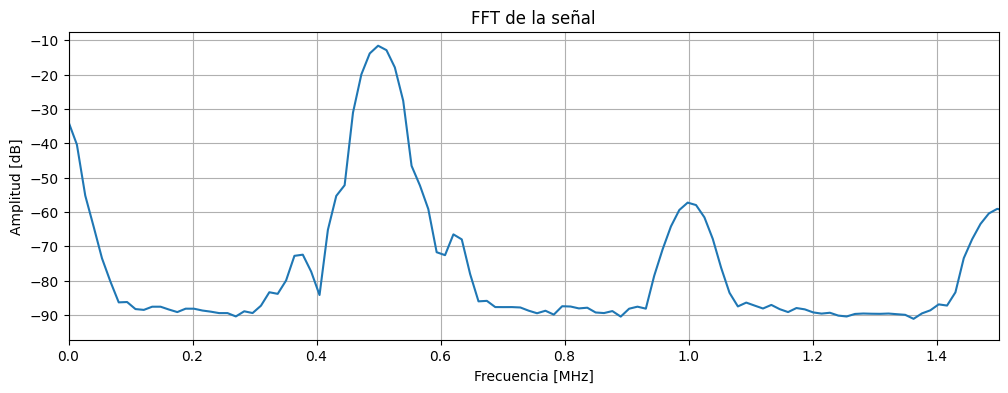

Mean frecuency max = 499.3109 kHz.


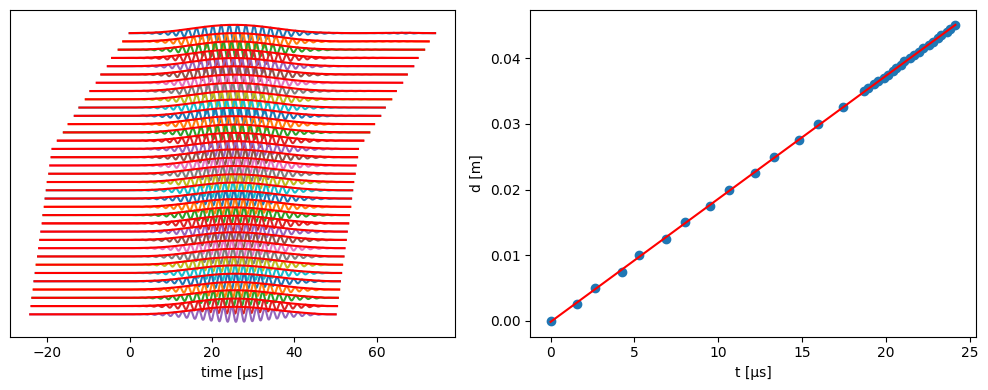

vg = 1874.2287 m/s; Intercept = -0.0001; r2 = 0.9999.


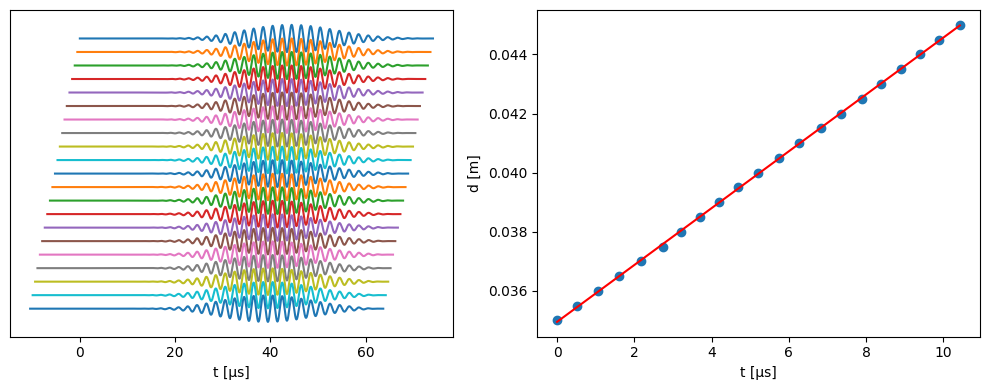

vf = 961.2404 m/s; Intercept = 0.035; r2 = 0.9999.


In [72]:
import importlib, lambmath
importlib.reload(lambmath)

from lambmath import full_analisis

fa = full_analisis(data_file[names[2]], dist, "inv", bp_w = 200e3)

E = 68.784 [GPa],  ν = -0.099
17508.064861559917


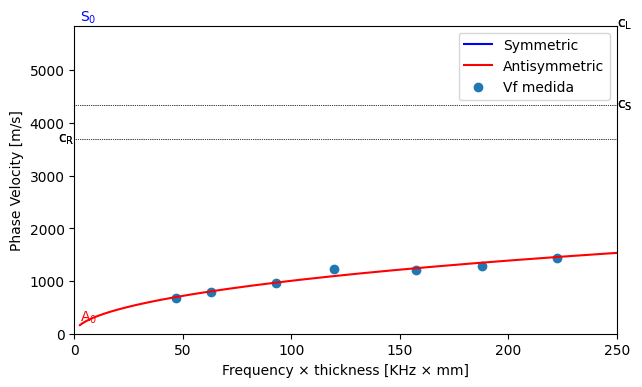

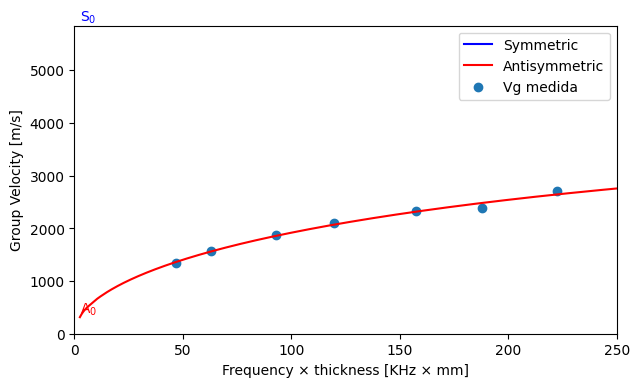

In [82]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.186          #Thickness mm
p = 2033           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([5e8, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2033          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 0.186, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=400, 
                    vp_max=10000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E_fit, v_fit, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=250, 
                vp_max=10000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.186 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.1, 2)

    E0 = 100e9 * r
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2033          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.186, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min())
v, v_er = (v.mean(), v.max() - v.min())

print("E =", E,"±", E_er/2)
print("v =", v,"±", v_er/2)


E = 68.9155169613678 ± 2.9548697480620945
v = -0.09291147410683225 ± 0.14537349342510278


[ -27.848  -25.416  -46.905   -1.909 -195.636  -61.158 -164.483]
[0.956 0.836 0.974 0.001 0.978 0.81  0.945]


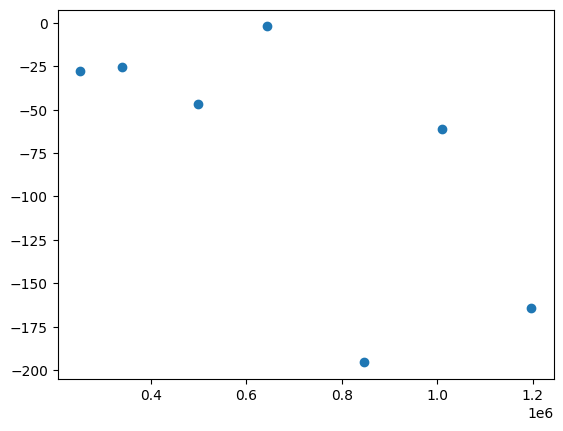

In [461]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = False)
    lr = linregress(dist, 20*np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

# Célula tipo n

In [233]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_n_tren_2305.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(2.5, 2.5 * 14 + 0.01, 2.5))
ultimo_punto = paso_largo[-1]
paso_corto = list(np.arange(ultimo_punto + 0.5, ultimo_punto+ 0.5 * 20 + 0.01, 0.5))
dist = np.array(inicio + paso_largo + paso_corto)*10**-3   #m

print(names)
print(data_file[names[0]].shape)

['fss_0250kHz', 'fss_0350kHz', 'fss_0500kHz', 'fss_0640kHz', 'fss_0840kHz', 'fss_1000kHz', 'fss_1200kHz']
(6534, 36)


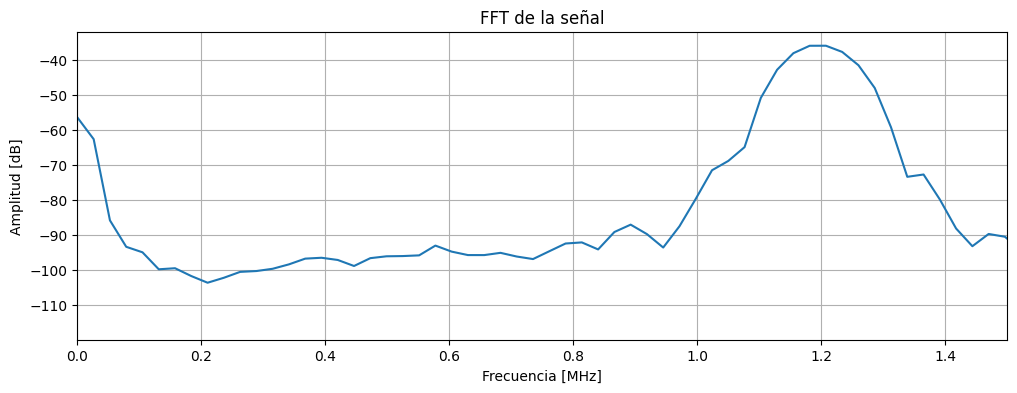

Mean frecuency max = 1207.3004 kHz.


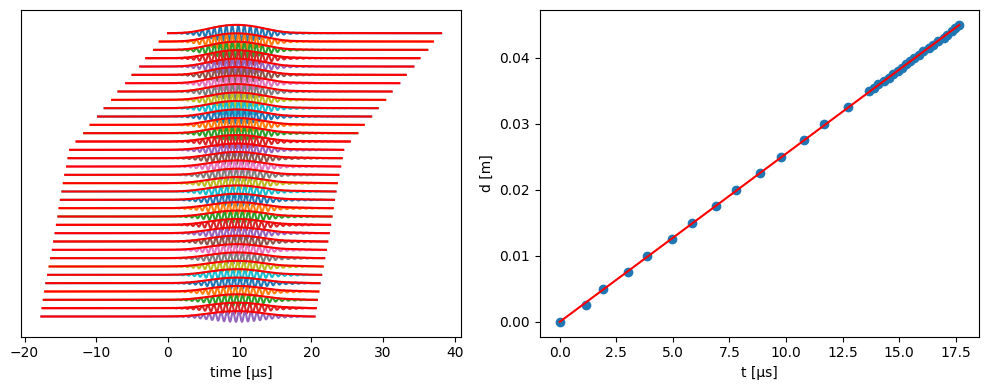

vg = 2549.7591 m/s; Intercept = -0.0; r2 = 0.9999.


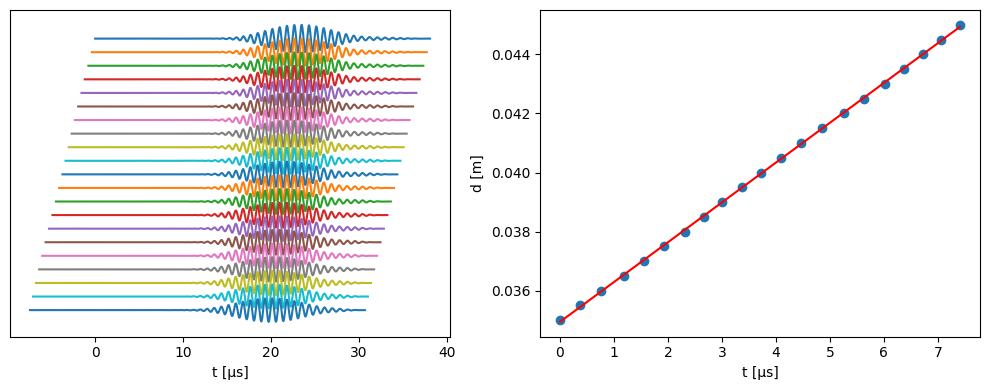

vf = 1348.0571 m/s; Intercept = 0.0349; r2 = 0.9998.


In [214]:
import importlib, lambmath         # primera importación
importlib.reload(lambmath)

from lambmath import full_analisis

fa = full_analisis(data_file[names[6]], dist, "inv", bp_w = 400e3)

E = 93.41 [GPa],  ν = -0.017
3367.23055073549


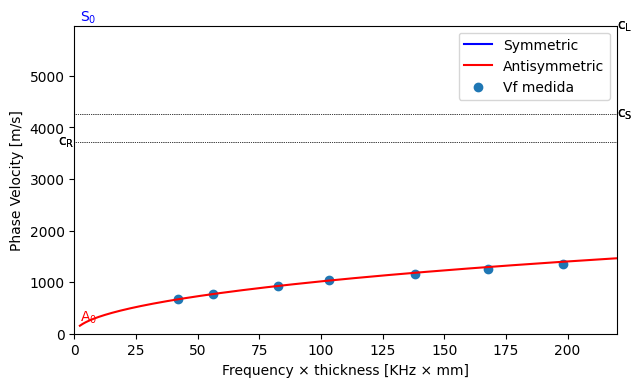

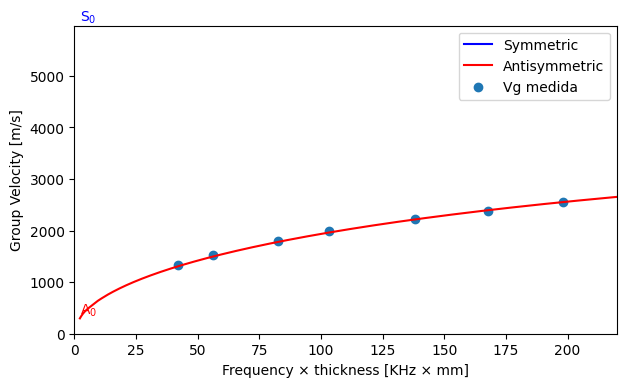

In [215]:
import numpy as np
from lambmath import full_analisis, max_frecuency, wave_speeds
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.164            #Thickness mm
p = 2620.5           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([1e9, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    #vgs.append(threshold_group_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2620.5          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 0.164, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=500, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E, v, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=220, 
                vp_max=7000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

In [216]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.164 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    analisis = full_analisis(data_in, dist, type_dist = "inv", bp_c = all_bp_center[n],
                              bp_w = all_bp_width[n], round_to = roundto , plot = False, print_data=False)
    
    vg = analisis[1]
    vf = analisis[2]
    vgs.append(vg[0])
    #vgs.append(threshold_group_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(vf[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.1, 2)

    E0 = 100e9 * r
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2620.5          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.164, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min())
v, v_er = (v.mean(), v.max() - v.min())

print("E =", E,"±", E_er/2)
print("v =", v,"±", v_er/2)

E = 93.51498244286896 ± 1.0614573556809148
v = -0.011567826763838045 ± 0.05897573695815422


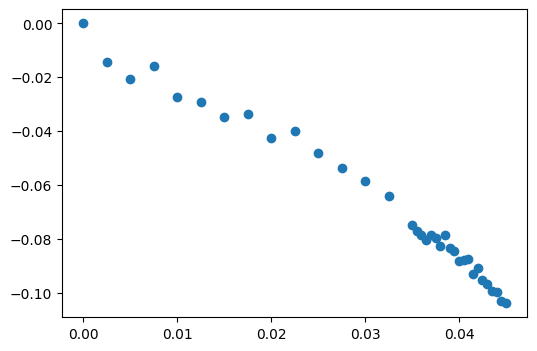

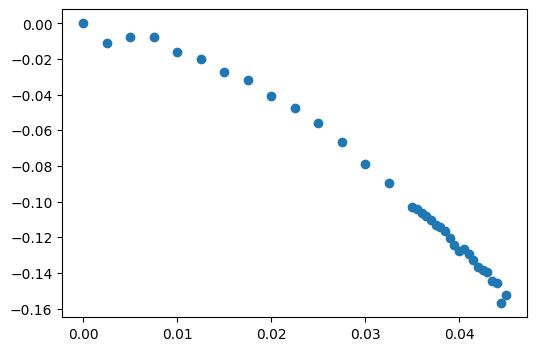

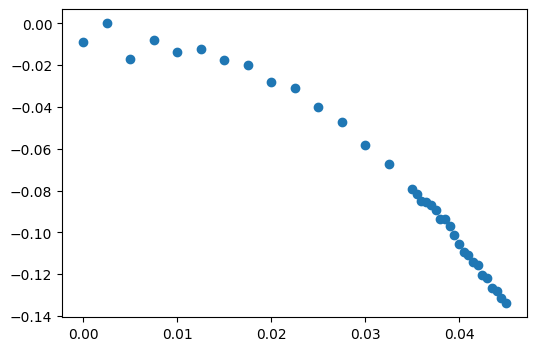

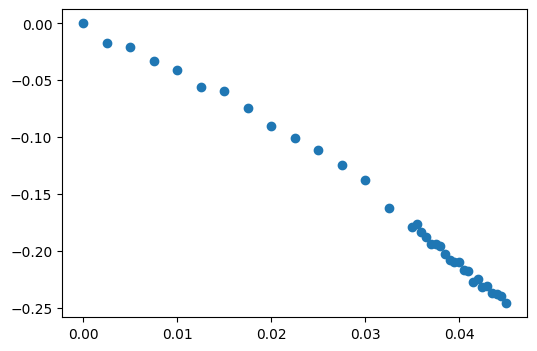

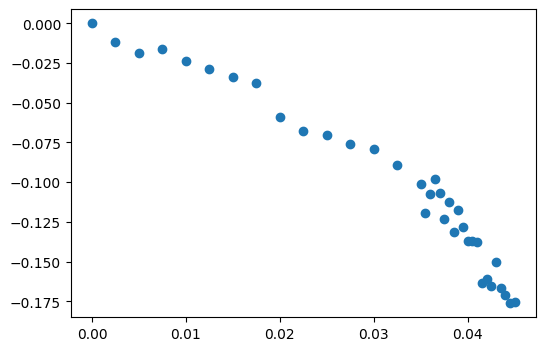

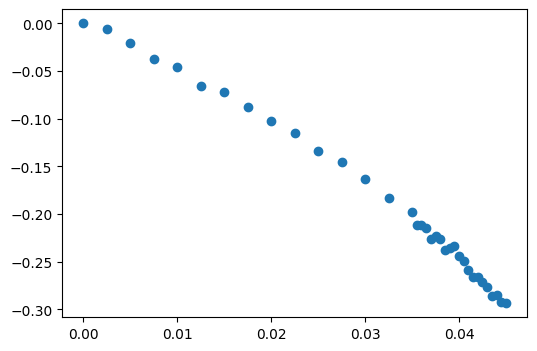

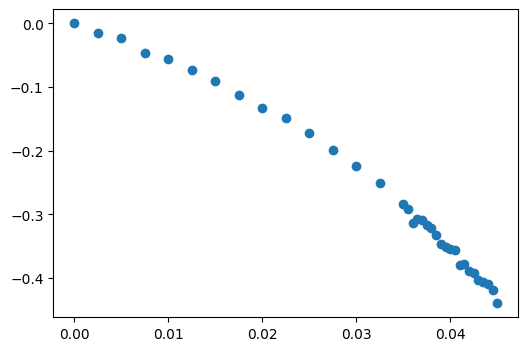

[ -42.889  -71.802  -60.964 -112.15   -75.842 -133.711 -197.913]
[0.978 0.969 0.927 0.989 0.932 0.987 0.978]


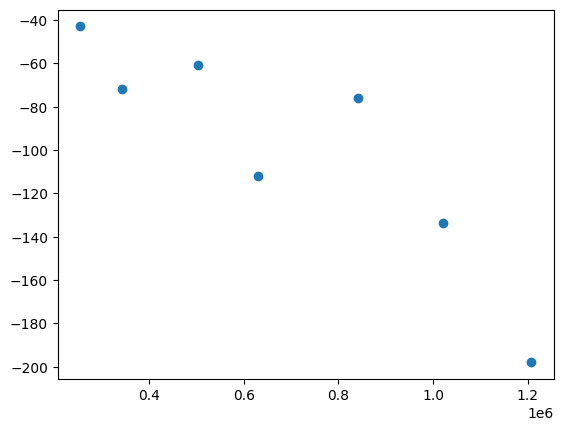

In [217]:
from lambmath import amplitudes
from scipy.stats import linregress

alpha = []
r2    = []
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

for i in range(len(names)):
    A = amplitudes(data_file[names[i]], dist, bp_w = all_bp_width[i], plot = True)
    lr = linregress(dist, 20*np.log(A/A.max()))
    alpha.append(lr[0])
    r2.append(lr[2]**2)

alpha = np.array(alpha).round(3)
r2    = np.array(r2).round(3)
print(alpha)
print(r2)

fr = [max_frecuency(data_file[name]) for name in names]

plt.scatter(fr, alpha)
plt.show()

# testing group_velocity Methods

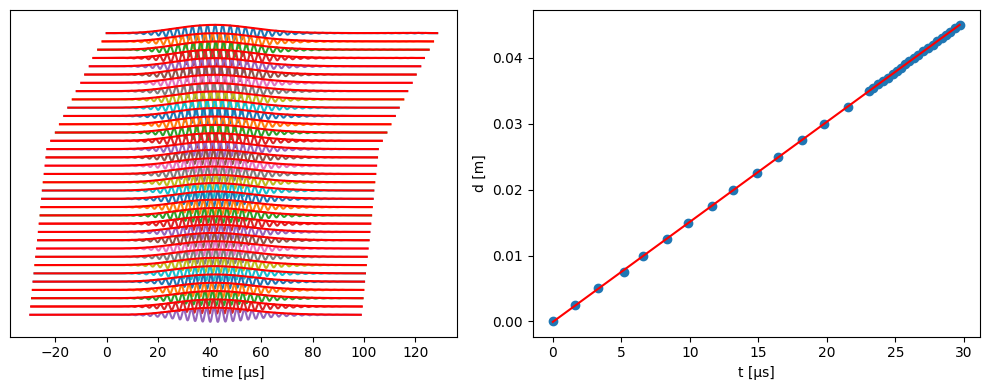

[ 1.51867714e+03 -7.07771671e-05  9.99964846e-01]


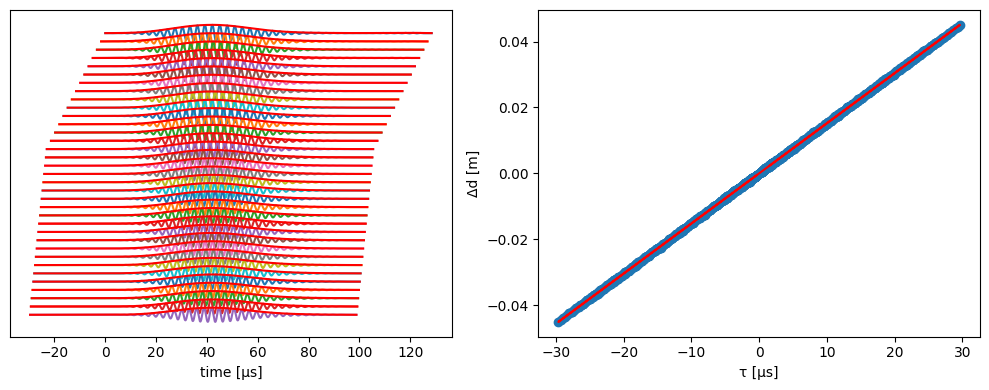

[1.52069243e+03 7.46368420e-19 9.99962243e-01]


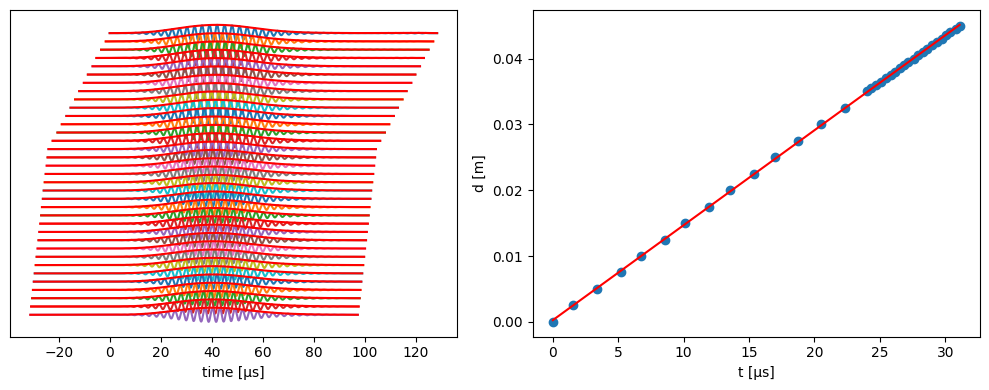

[1.44194799e+03 2.65621591e-04 9.99916636e-01]


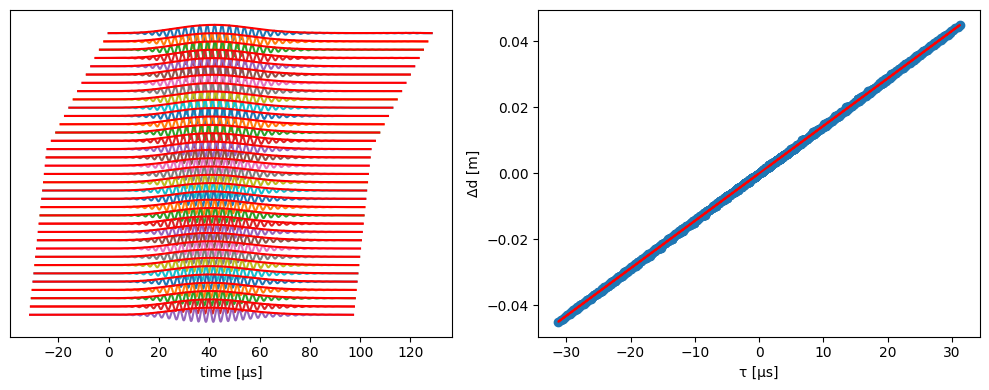

[1.43963596e+03 7.46368420e-19 9.99919028e-01]


In [224]:
import importlib, lambmath
importlib.reload(lambmath)
from lambmath import cc_group_velocity, cc_group_velocity_all, threshold_group_velocity, threshold_group_velocity_all, max_frecuency

print(           cc_group_velocity(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(       cc_group_velocity_all(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(    threshold_group_velocity(data_file[names[1]], dist, plot = True, bp_w = 200e3))
print(threshold_group_velocity_all(data_file[names[1]], dist, plot = True, bp_w = 200e3))

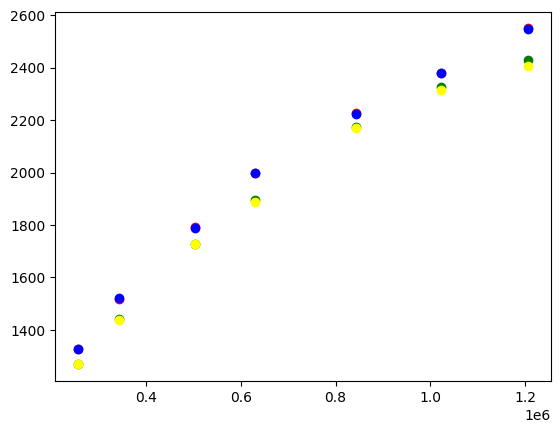

In [212]:
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])

vgmx = []
fc = []

colors = ["red", "blue", "green", "yellow"]

for i in range(len(names)):
    v = []

    fc.append(max_frecuency(data_file[names[i]]))
    v.append(cc_group_velocity(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(cc_group_velocity_all(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(threshold_group_velocity(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))
    v.append(threshold_group_velocity_all(data_file[names[i]], dist, plot = False, bp_w = all_bp_width[i]))

    vgmx.append(v)
vgmx = np.array(vgmx)

for i in range(len(names)): 
    for j in range(4):
        plt.scatter(fc[i], vgmx[i][j][0], c = colors[j])
plt.show()

E = 81.061 [GPa],  ν = 0.316
2270.379092729168


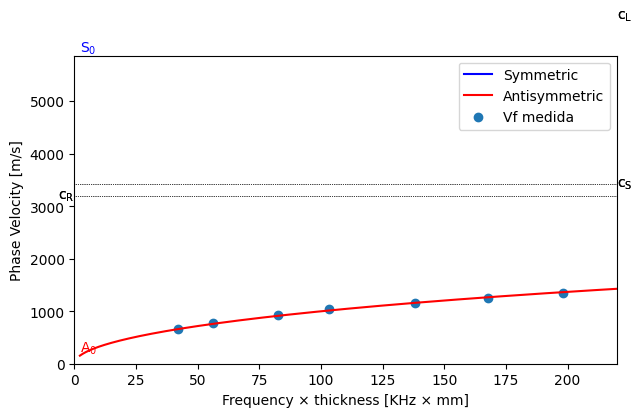

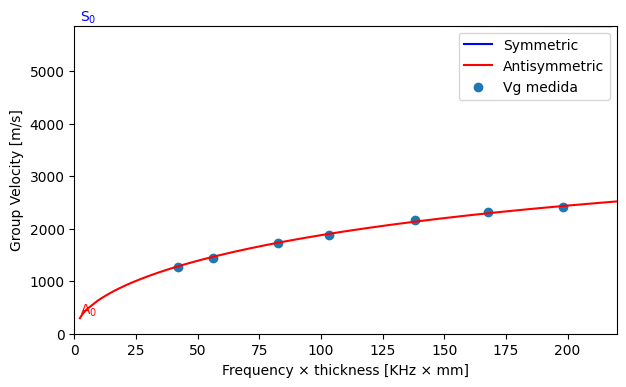

In [ ]:
import numpy as np
from lambmath import cc_phase_velocity, threshold_group_velocity_all, max_frecuency, wave_speeds
from scipy.optimize import least_squares
from lambwaves import Lamb
import matplotlib.pyplot as plt
import warnings


#---------------------------------------------------------------------------------

roundto = 5
b = 0.164            #Thickness mm
p = 2620.5           #kg/m³
E0 = 100e9
v0 = 0.3
bounds = ([1e9, -0.999], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    vgs.append(threshold_group_velocity_all(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(           cc_phase_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False, type_dist = "inv")[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

#---------------------------------------------------------------------------------

def residuals(params, x1, y1, x2, y2):
    E, v = params
    p = 2620.5          #kg/m³

    c_L, c_S, c_R = wave_speeds(E, v, p)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        pol = Lamb(thickness= 0.164, #mm
                    nmodes_sym=1, 
                    nmodes_antisym=1,
                    fd_max=500, 
                    vp_max=15000, 
                    c_L=c_L, 
                    c_S=c_S, 
                    c_R=c_R, 
                    material='Aluminio')

    r1 = pol.vp_antisym['A0'](x1) - y1       
    r2 = pol.vg_antisym['A0'](x2) - y2

    #return r1 
    return np.concatenate([r1, r2]) 


p0 = (E0, v0)
result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

E_fit, v_fit = result.x
print("E =", round(E_fit*10**(-9),3), "[GPa],  ν =", round(v_fit, 3))
print(result.cost)

#---------------------------------------------------------------------------------

E = E_fit          # Módulo de Young en Pa
v = v_fit          # Coeficiente de Poisson

c_L, c_S, c_R = wave_speeds(E, v, p)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    pol = Lamb(thickness= b, #mm
                nmodes_sym=1, 
                nmodes_antisym=1,
                fd_max=220, 
                vp_max=7000,
                c_L=c_L, 
                c_S=c_S, 
                c_R=c_R, 
                material='Aluminio')

pol.plot_phase_velocity()
plt.scatter(frb, vfs, label="Vf medida")

plt.legend()
plt.show()  

pol.plot_group_velocity()
plt.scatter(frb, vgs, label="Vg medida")

plt.legend()
plt.show()  

In [ ]:
import numpy as np
from lambmath import full_analisis, max_frecuency
from scipy.optimize import least_squares
from lambwaves import Lamb
import warnings

# Comprobar la fiabilidad del resultado haciendo 20 repeticiones empezando desde puntos distintos

b = 0.164 
roundto = 5
bounds = ([5e8, -1], [500e9, 0.499])

all_bp_center = np.array([max_frecuency(data_file[name]) for name in names])
all_bp_width  = np.array([200e3, 200e3, 200e3, 200e3, 400e3, 400e3, 400e3])
frb = all_bp_center*10**(-3)*b

vgs = []
vfs = []

for n in range(len(names)):
    data_in = data_file[names[n]]

    vgs.append(threshold_group_velocity_all(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False)[0])
    vfs.append(           cc_phase_velocity(data_in, dist, bp_c = all_bp_center[n], bp_w = all_bp_width[n], plot = False, type_dist = "inv")[0])

vgs = np.array(vgs)
vfs = np.array(vfs)

E = []
v = []

for i in range(20):
    #---------------------------------------------------------------------------------

    rng = np.random.default_rng()
    r = rng.uniform(0.1, 2)

    E0 = 100e9 * r
    v0 = 0.3

    #---------------------------------------------------------------------------------

    def residuals(params, x1, y1, x2, y2):
        E, v = params
        p = 2620.5          # Densidad en kg/m³

        c_L, c_S, c_R = wave_speeds(E, v, p)
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=RuntimeWarning)
            pol = Lamb(thickness= 0.164, #en mm
                        nmodes_sym=1, 
                        nmodes_antisym=1,
                        fd_max=500, 
                        vp_max=15000, 
                        c_L=c_L, 
                        c_S=c_S, 
                        c_R=c_R, 
                        material='Aluminio')

        r1 = pol.vp_antisym['A0'](x1) - y1       
        r2 = pol.vg_antisym['A0'](x2) - y2

        #return r1
        return np.concatenate([r1, r2]) 


    p0 = (E0, v0)
    result = least_squares(residuals, p0, args=(frb, vfs, frb, vgs), bounds = bounds)

    E_fit, v_fit = result.x
    E.append(E_fit)
    v.append(v_fit)

E = np.array(E)*10**-9
v = np.array(v)

E, E_er = (E.mean(), E.max() - E.min())
v, v_er = (v.mean(), v.max() - v.min())

print("E =", E,"±", E_er/2)
print("v =", v,"±", v_er/2)

E = 81.05970385772817 ± 0.003496692946939106
v = 0.3164185147605729 ± 0.0001224427557505181


# Test de placa solar

In [346]:
from scipy.io import loadmat
import numpy as np

data_file = loadmat('erik/test_polymod_3005.mat')
names = [i for i in data_file.keys()][3:]

inicio = [0]
paso_largo = list(np.arange(5, 5 * 33 + 0.01, 5))
dist_vg = np.array(inicio + paso_largo)*10**-3   #m

inicio = [0]
paso_corto = list(np.arange(0.5, 0.5 * 20 + 0.01, 0.5))
dist_vf = np.array(inicio + paso_corto)*10**-3   #m

print(names)

['fss_180kHz', 'fss_180kHz_T', 'fss_180kHz_vf', 'fss_180kHz_vf_T']


176655.93043836576


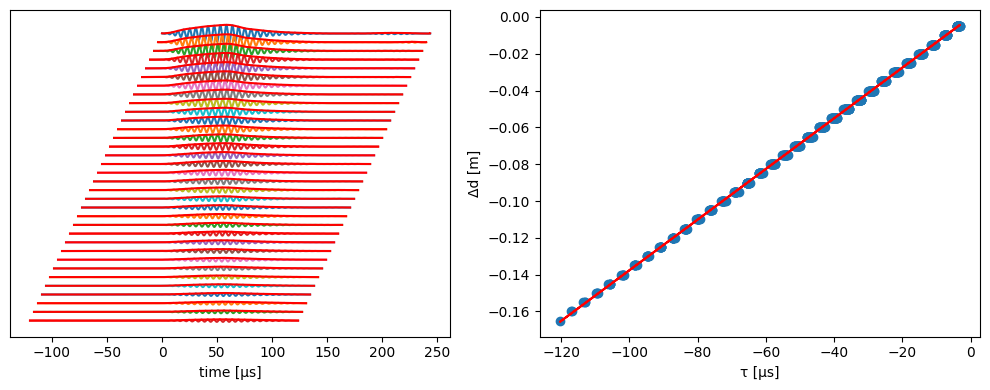

[ 1.37631120e+03 -1.13092778e-05  9.99806127e-01]


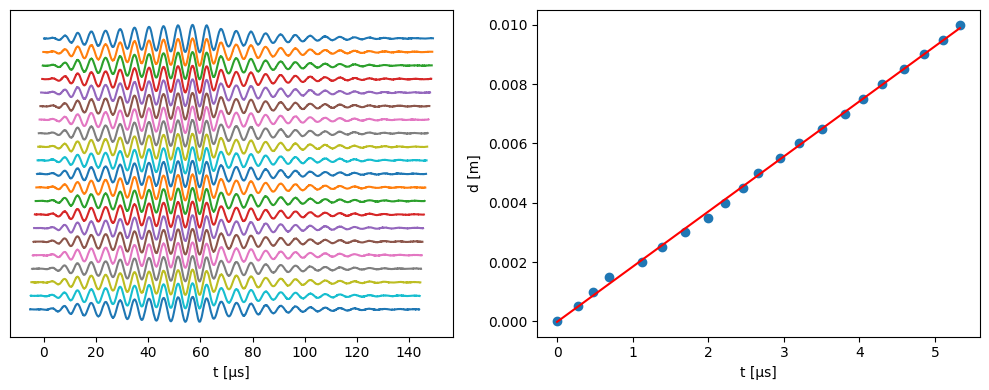

[ 1.85985024e+03 -1.87812304e-05  9.99015957e-01]
179038.07035053373


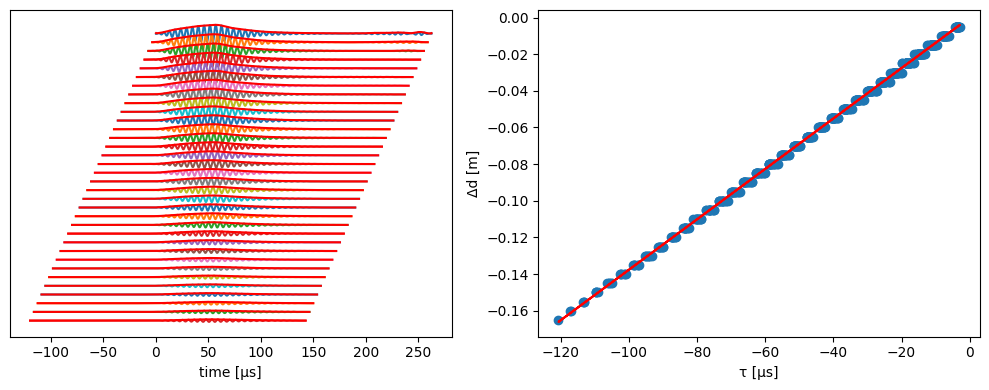

[ 1.37571615e+03 -3.18949957e-05  9.99453229e-01]


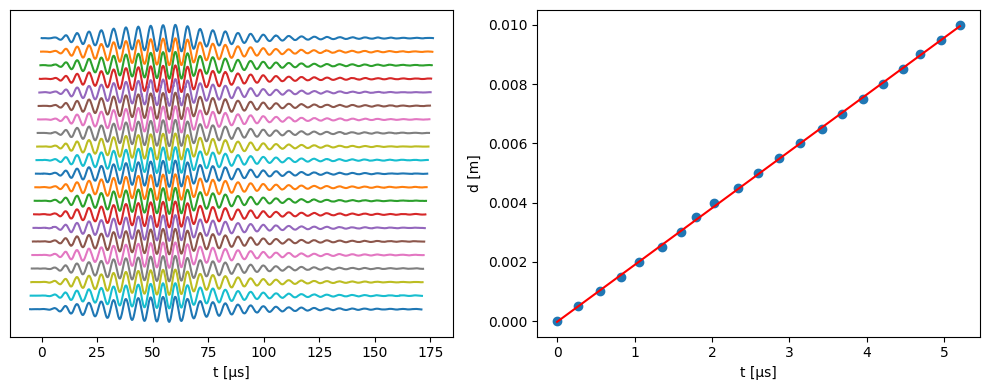

[ 1.92007378e+03 -2.91608114e-05  9.99688336e-01]


In [354]:
data_in = data_file[names[0]]

print(max_frecuency(data_in))
print(threshold_group_velocity_all(data_in, dist_vg, bp_w = 100e3, plot = True))
print(cc_phase_velocity(data_file[names[2]], dist_vf, type_dist = None, plot = True))

data_in = data_file[names[1]]

print(max_frecuency(data_in))
print(threshold_group_velocity_all(data_in, dist_vg, bp_w = 100e3, plot = True))
print(cc_phase_velocity(data_file[names[3]], dist_vf, type_dist = None, plot = True))